In [ ]:
pip install geopandas

In [ ]:
pip install geoplot

In [1]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import datetime as dt

%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Indonesian boundaries Shape

In [5]:
indshp = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/Indonesia shape/prov.shp")
indshp.head()

NAME_0  ...                                           geometry
0  Indonesia  ...  MULTIPOLYGON (((107.96173 -3.41100, 107.96220 ...
1  Indonesia  ...  MULTIPOLYGON (((122.81573 0.84676, 122.81579 0...
2  Indonesia  ...  MULTIPOLYGON (((101.64432 -0.82552, 101.64344 ...
3  Indonesia  ...  MULTIPOLYGON (((106.73563 -6.04014, 106.73548 ...
4  Indonesia  ...  MULTIPOLYGON (((105.25355 -1.29511, 105.25032 ...

[5 rows x 4 columns]

Merubah nama column NAME_1 jadi Provinsi

In [6]:
indshp.rename(columns={'NAME_1':'Provinsi'}, inplace=True)

In [7]:
#Merubah nama provinsi Jakarta Raya menjadi DKI Jakarta pada DataFrame
indshp.iloc[3, 1] = indshp.iloc[3, 1].replace("Jakarta Raya","DKI Jakarta")

#Merubah nama provinsi Yogyakarta menjadi Daerah Istimewa Yogyakarta pada DataFrame
indshp.iloc[17, 1] = indshp.iloc[17, 1].replace("Yogyakarta","Daerah Istimewa Yogyakarta")

In [8]:
#Mengambil data untuk provinsi yang ada di pulau jawa
javashp = indshp.loc[indshp["Provinsi"].isin(["DKI Jakarta","Banten","Jawa Barat", "Jawa Tengah","Jawa Timur","Daerah Istimewa Yogyakarta"])]

#Data Covid

In [9]:
dfcovid = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Indonesia shape/covid_19_indonesia_time_series_all.csv")
dfcovid

Date  ... Growth Factor of New Deaths
0       3/1/2020  ...                         NaN
1       3/2/2020  ...                        1.00
2       3/2/2020  ...                         NaN
3       3/2/2020  ...                         NaN
4       3/2/2020  ...                         NaN
...          ...  ...                         ...
13009  3/28/2021  ...                        0.00
13010  3/28/2021  ...                        1.00
13011  3/28/2021  ...                        2.00
13012  3/28/2021  ...                        1.50
13013  3/28/2021  ...                        0.67

[13014 rows x 37 columns]

In [10]:
#Mengubah tipe data column Date menjadi Datetime
dfcovid["Date"] = pd.to_datetime(dfcovid["Date"])

In [11]:
#Menambahkan kolom YearMonth
dfcovid['YearMonth'] = dfcovid['Date'].map(lambda x: 100*x.year + x.month)

In [12]:
#Lakukan groupby dengan Provinsi dan YearMonth untuk mendapatkan jumlah kasus perbulan
dfcovid = dfcovid.groupby(["Province","YearMonth"]).sum()

In [13]:
#untuk reset index dfcovid
dfcovid = dfcovid.reset_index()

Merge Data Boundaries dan covid untuk pulau Jawa




In [14]:
java_covid = javashp.merge(dfcovid, left_on="Provinsi", right_on="Province")
java_covid 

NAME_0  ... Growth Factor of New Deaths
0   Indonesia  ...                       23.41
1   Indonesia  ...                       39.19
2   Indonesia  ...                       41.10
3   Indonesia  ...                       29.21
4   Indonesia  ...                       22.66
..        ...  ...                         ...
73  Indonesia  ...                       36.59
74  Indonesia  ...                       48.65
75  Indonesia  ...                       59.02
76  Indonesia  ...                       70.77
77  Indonesia  ...                      182.64

[78 rows x 31 columns]

In [15]:
#Mengambil data untuk setiap provinsi di pulau jawa
java_covid = java_covid.loc[java_covid["Provinsi"].isin(["DKI Jakarta","Banten","Jawa Barat", "Jawa Tengah","Jawa Timur","Daerah Istimewa Yogyakarta"])]

#Visualisasi Pulau Jawa

Text(0.5, 1.0, 'COVID-19 Total Cases/million on February 2021 in Java Island')

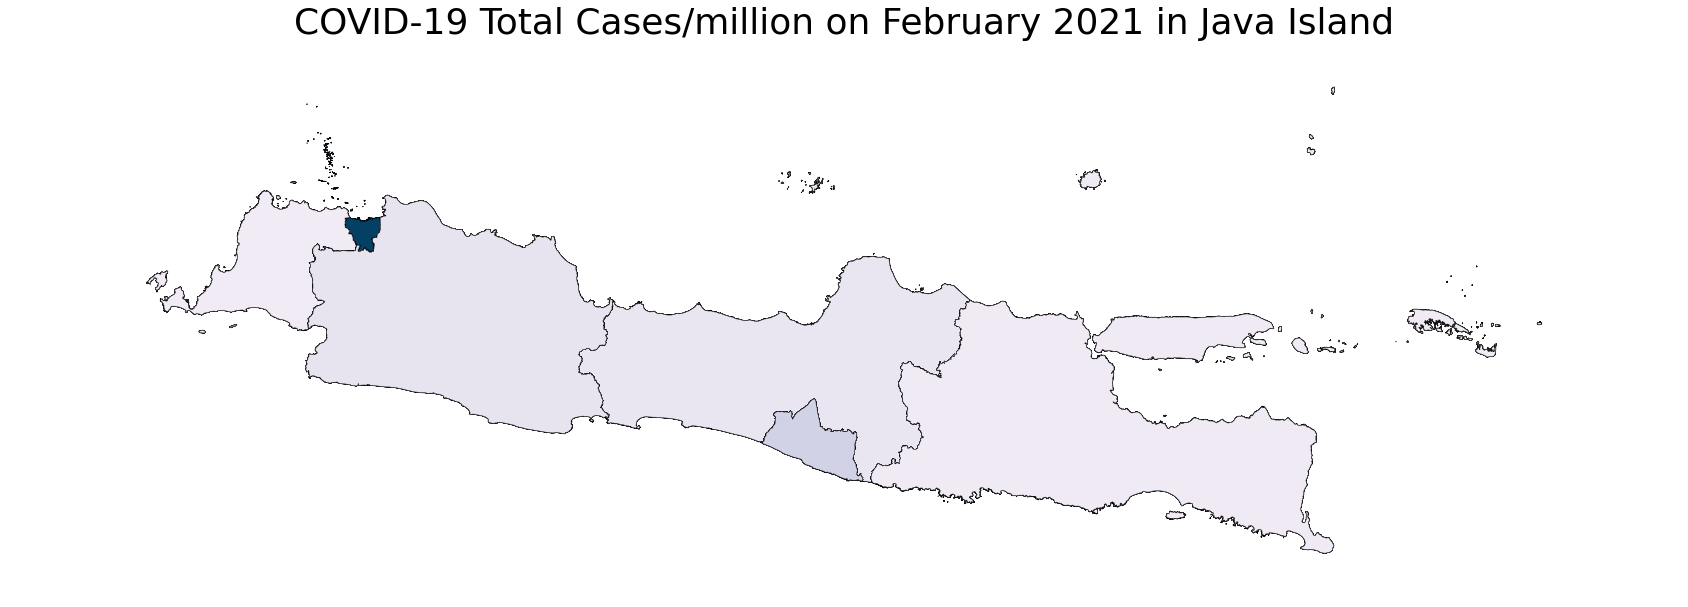

In [16]:
ax = gplt.choropleth(
    java_covid,
    hue="Total Cases per Million",
    edgecolor="black",
    linewidth=0.5,
    cmap='PuBu',
    alpha = 0.8,
    figsize=(30, 30)
)

gplt.polyplot(javashp, edgecolor='black', ax=ax)

ax.set_title(
    "COVID-19 Total Cases/million on February 2021 in Java Island",
    fontsize=36
)

In [17]:
#untuk iterasi dalam mengeluarkan plot setiap bulan
date_list = java_covid.YearMonth.drop_duplicates()
date_list

0     202003
1     202004
2     202005
3     202006
4     202007
5     202008
6     202009
7     202010
8     202011
9     202012
10    202101
11    202102
12    202103
Name: YearMonth, dtype: int64

Menampilkan plot sebaran covid untuk pulau jawa setiap bulan dari bulan Maret 2020 sampai Maret 2021

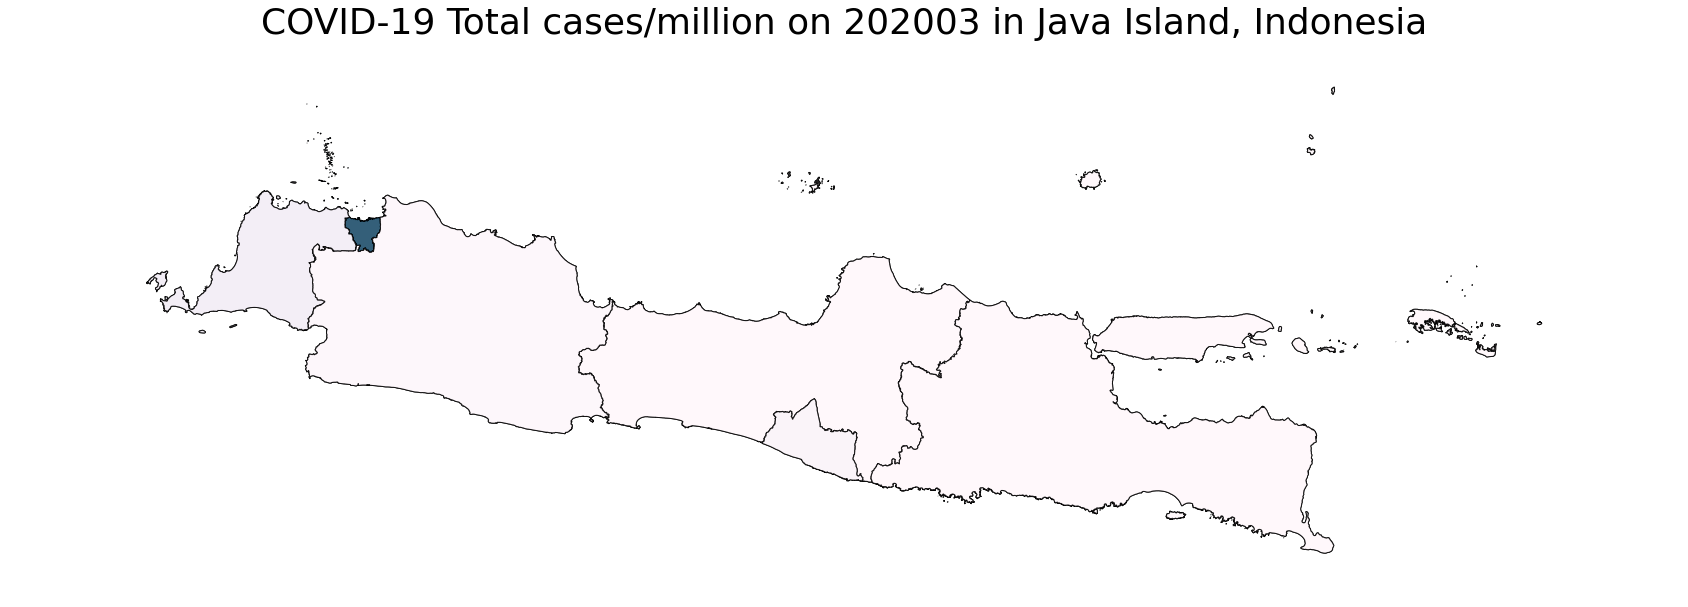

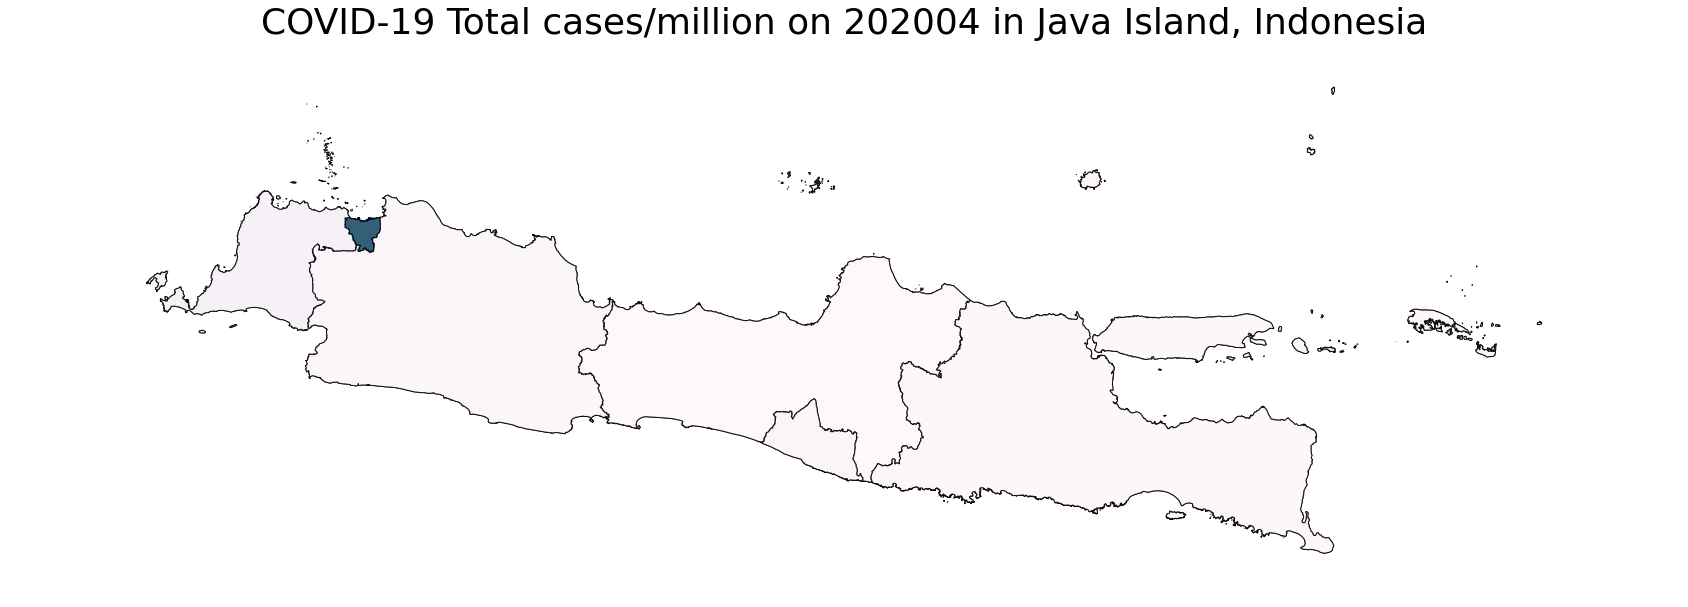

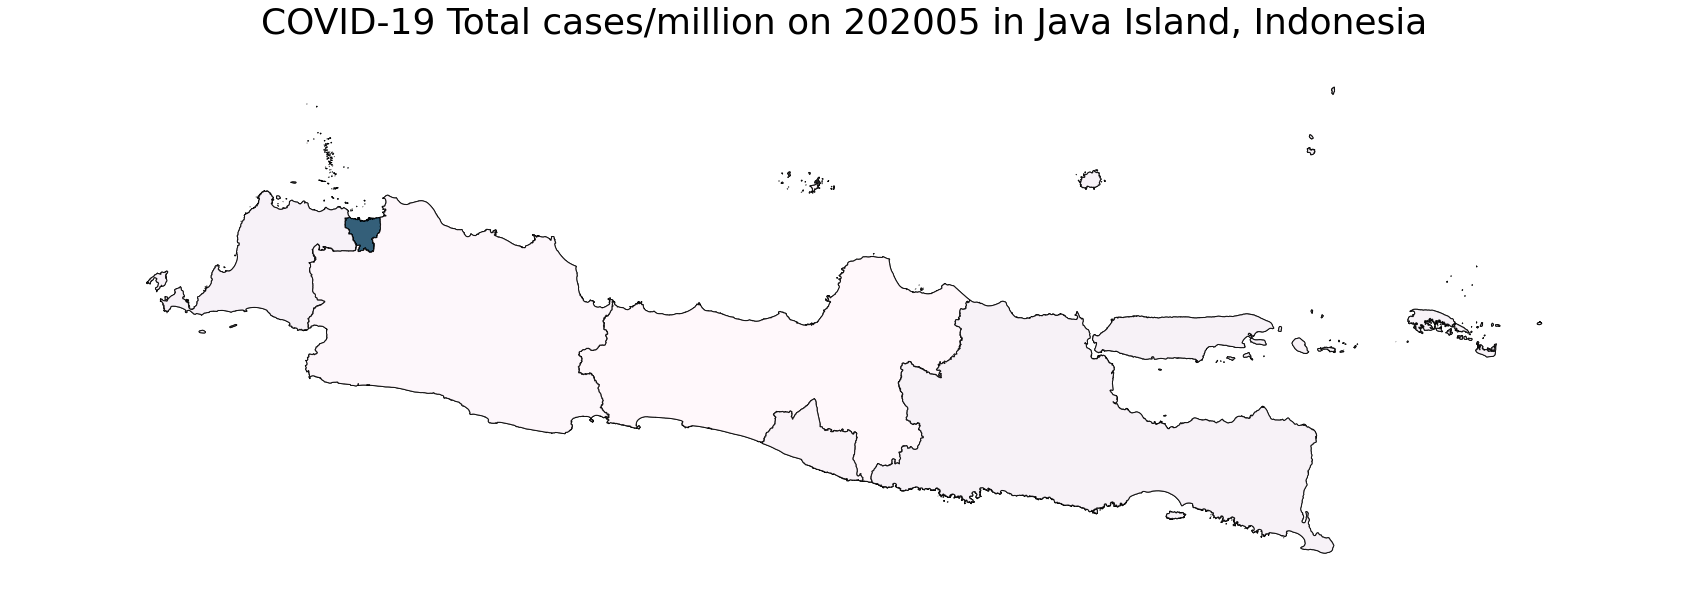

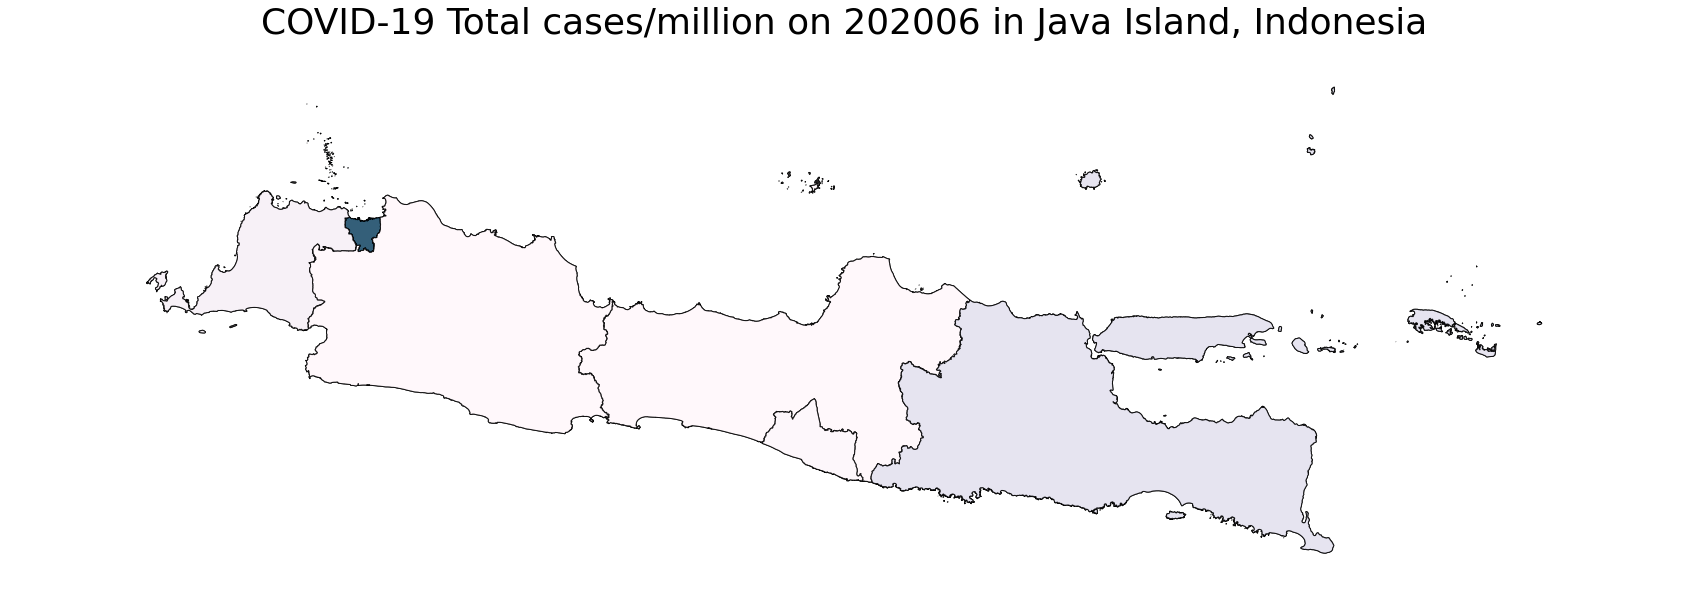

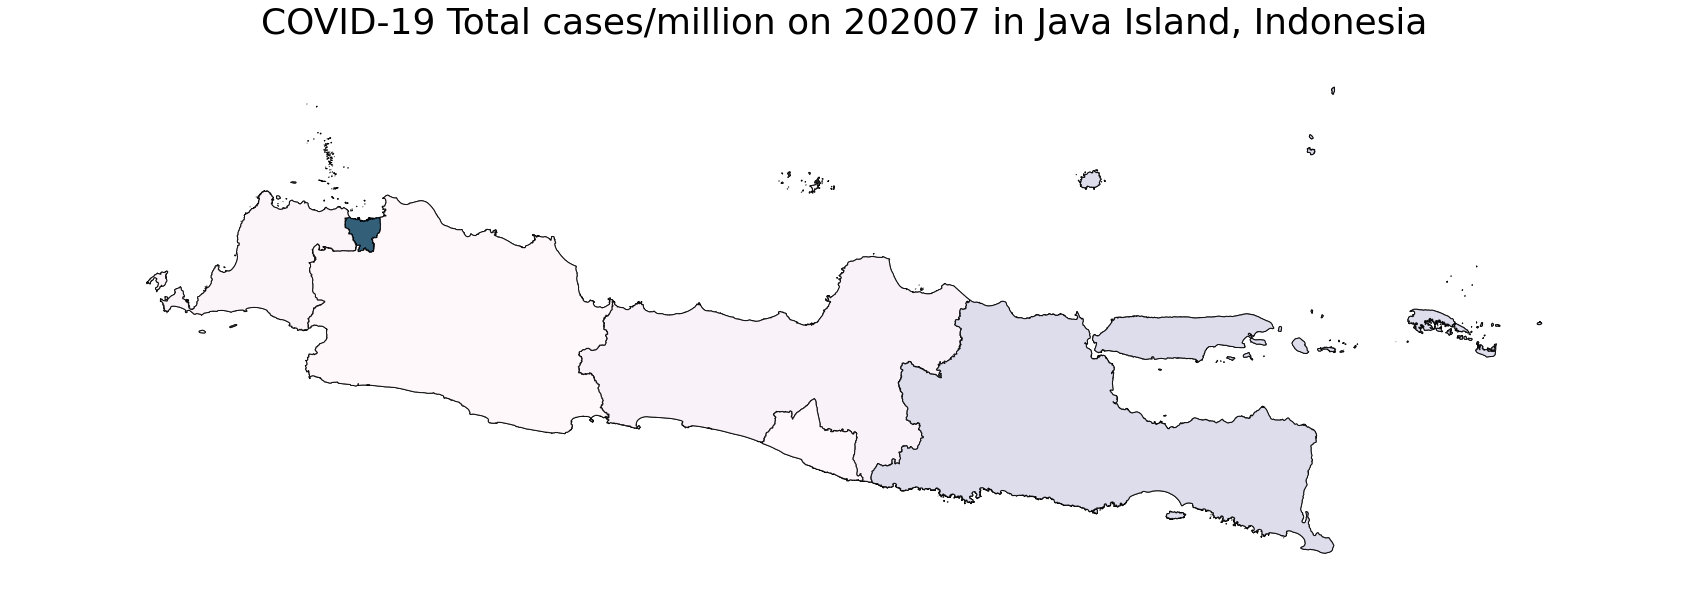

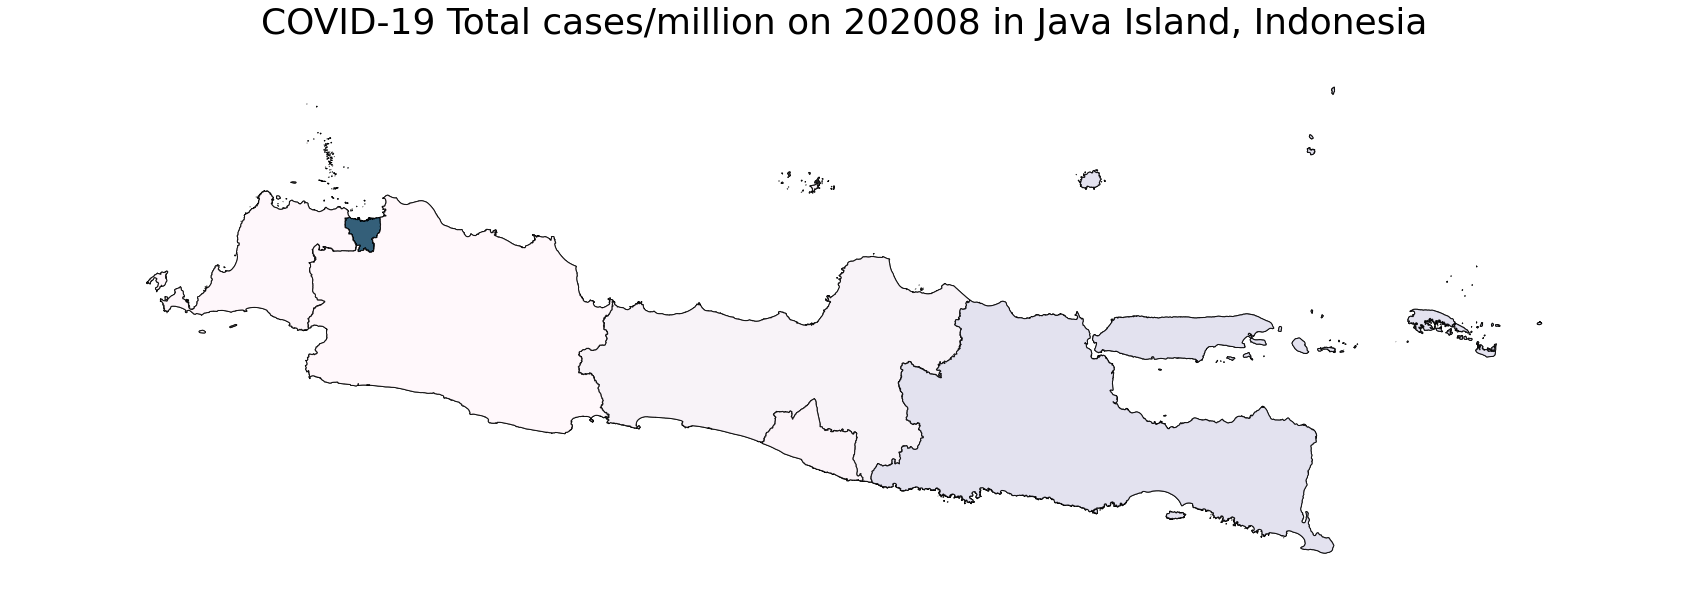

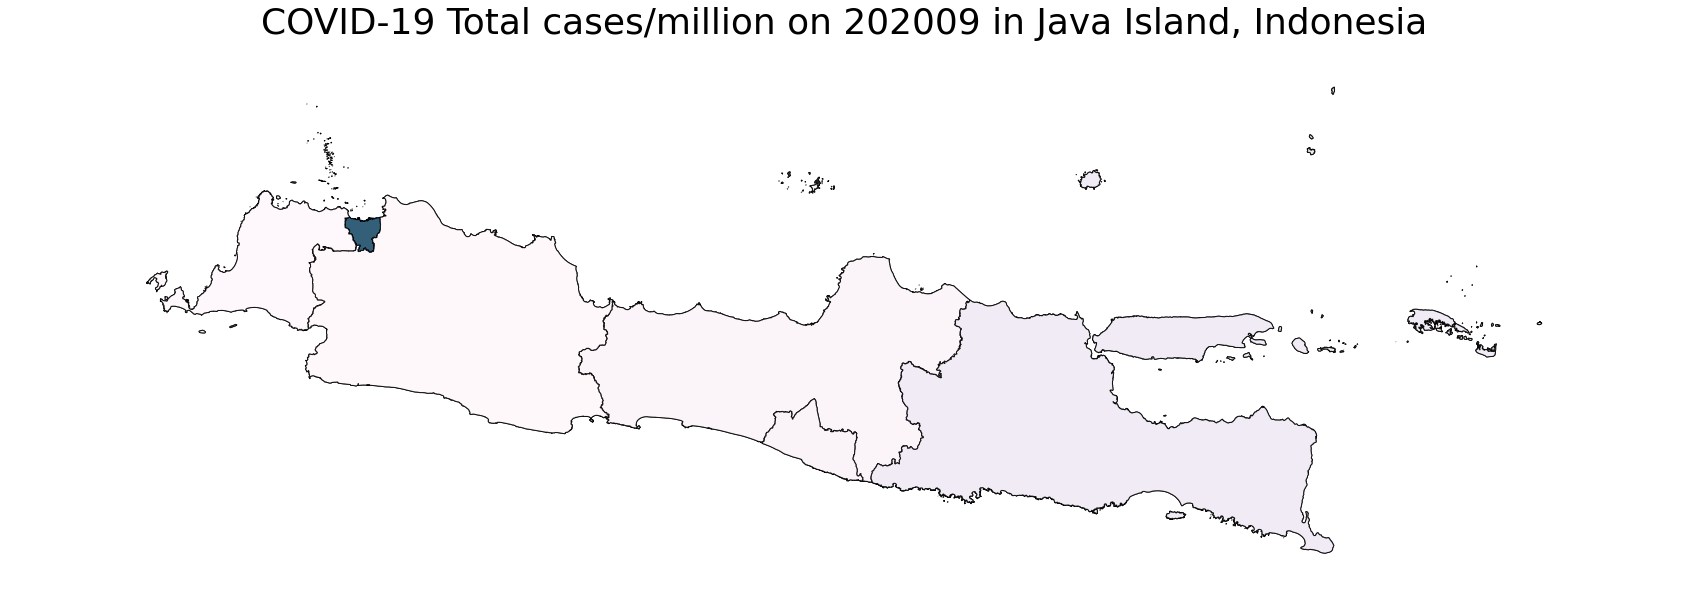

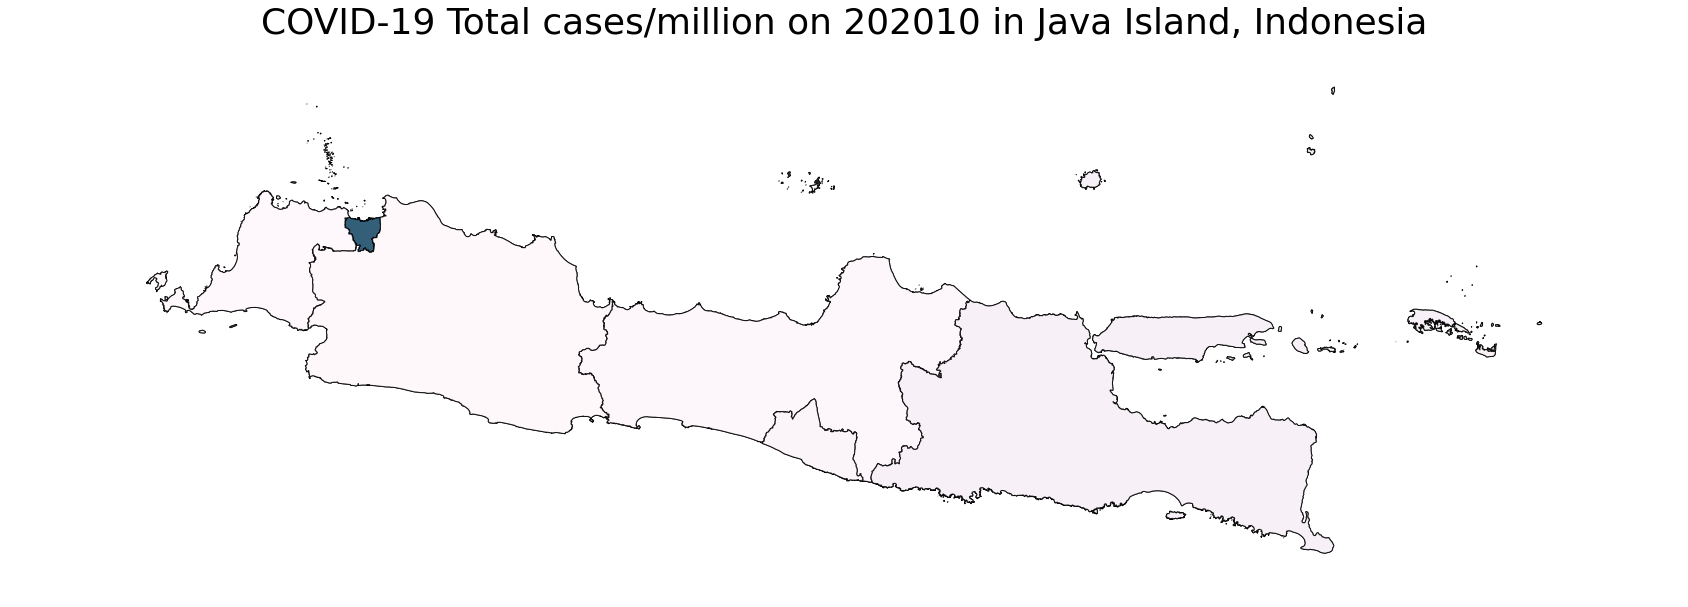

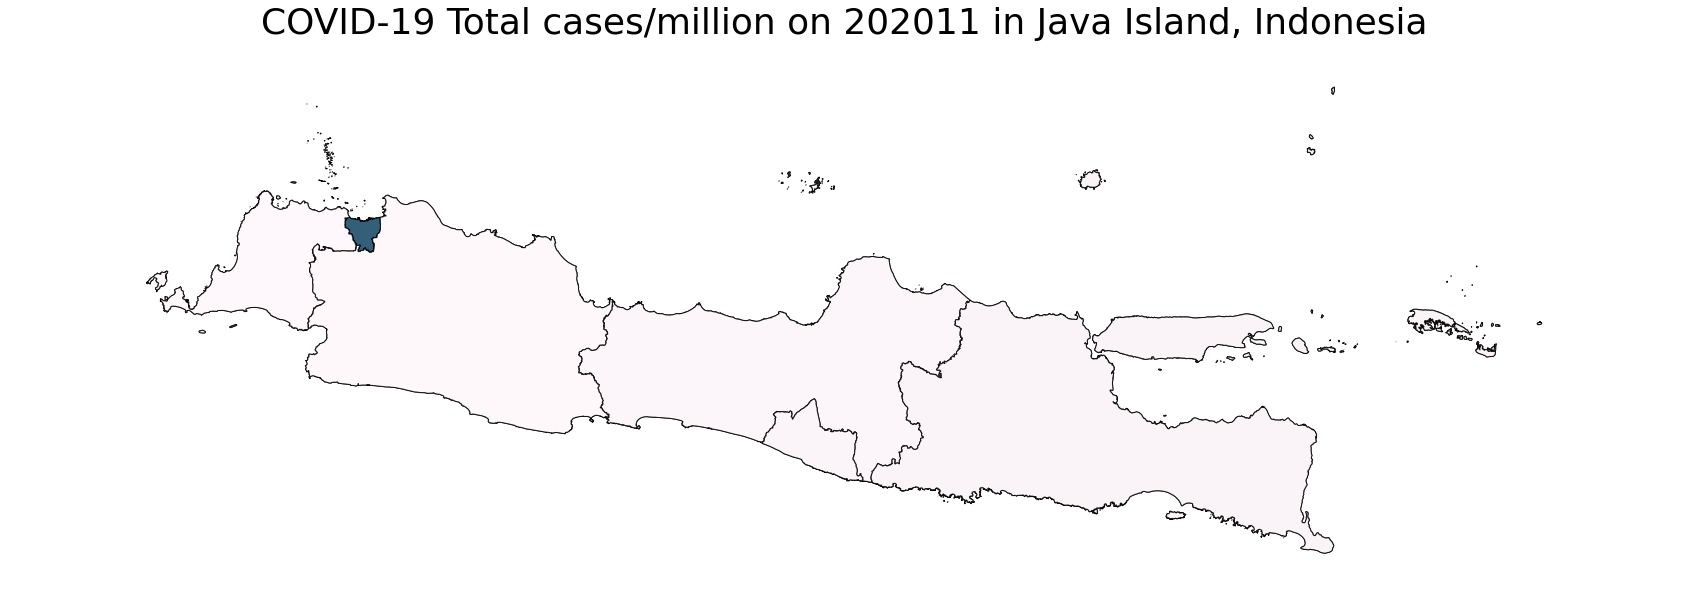

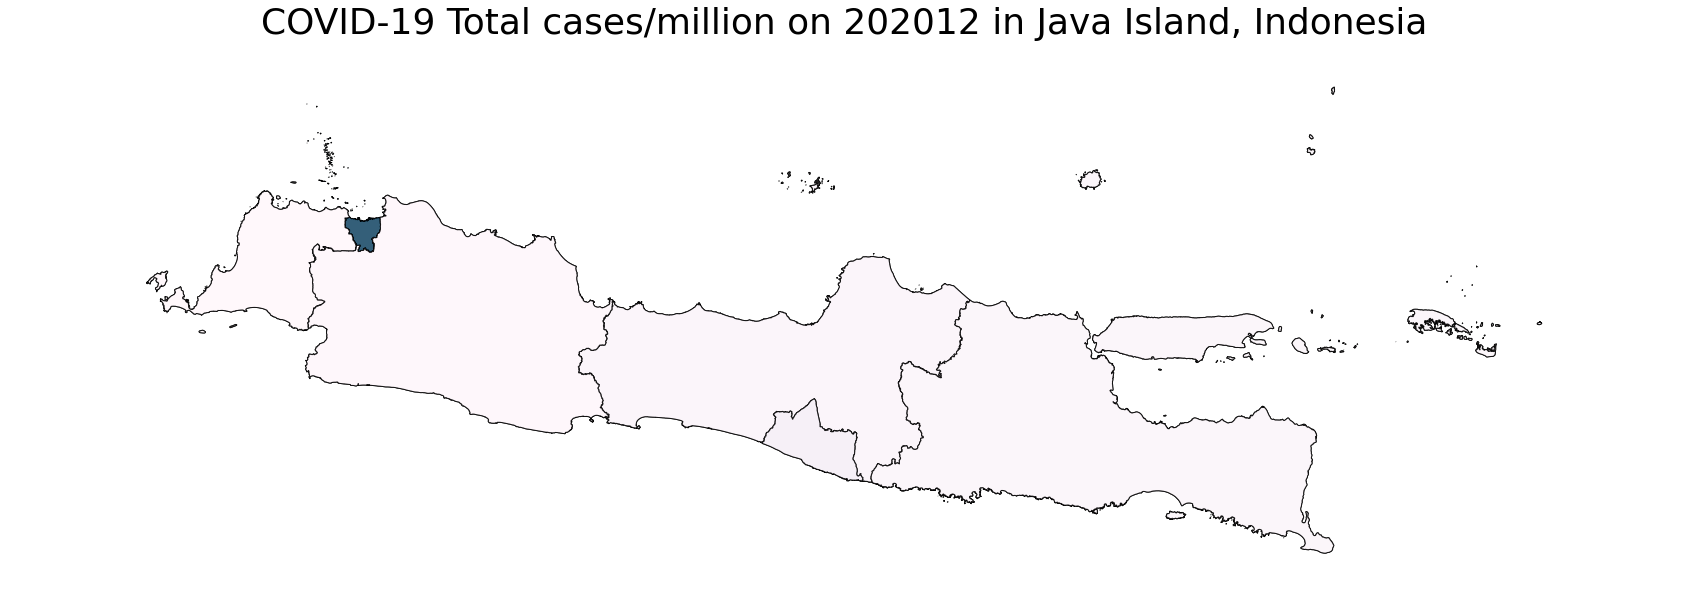

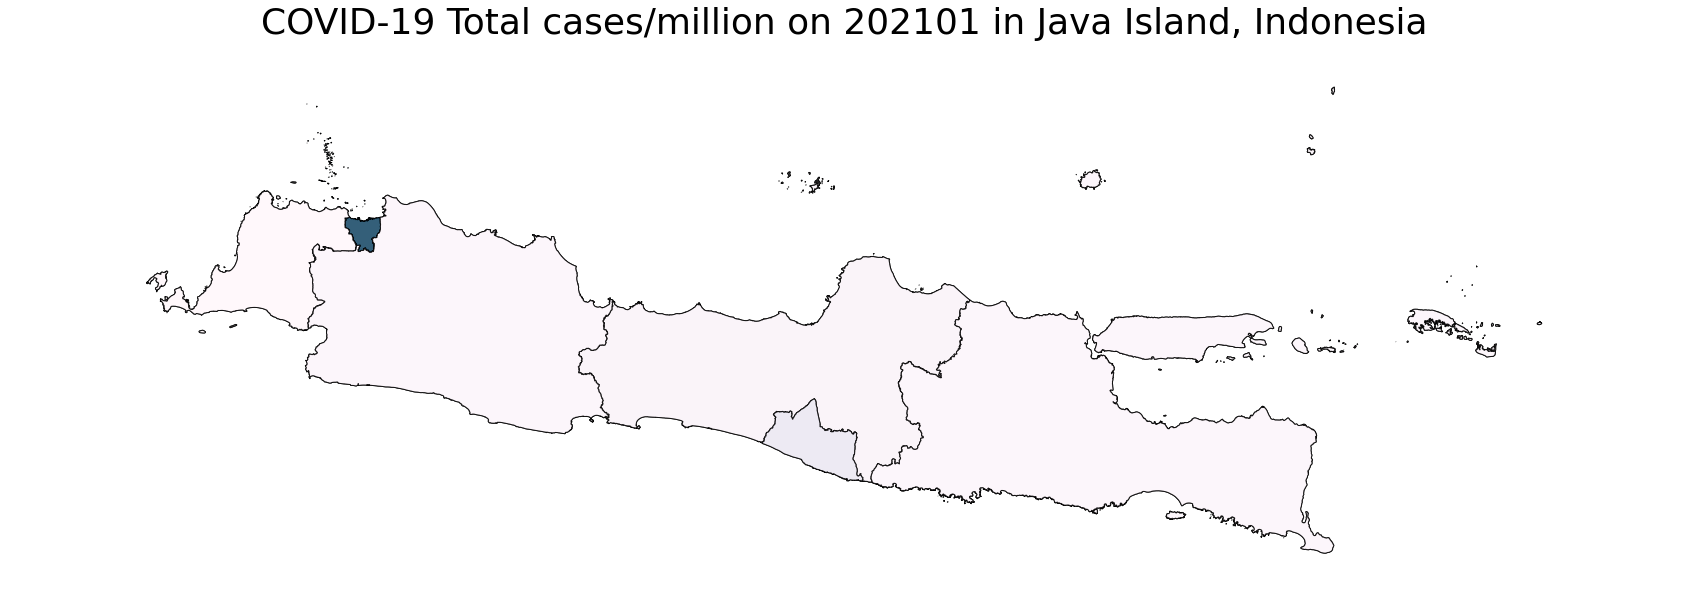

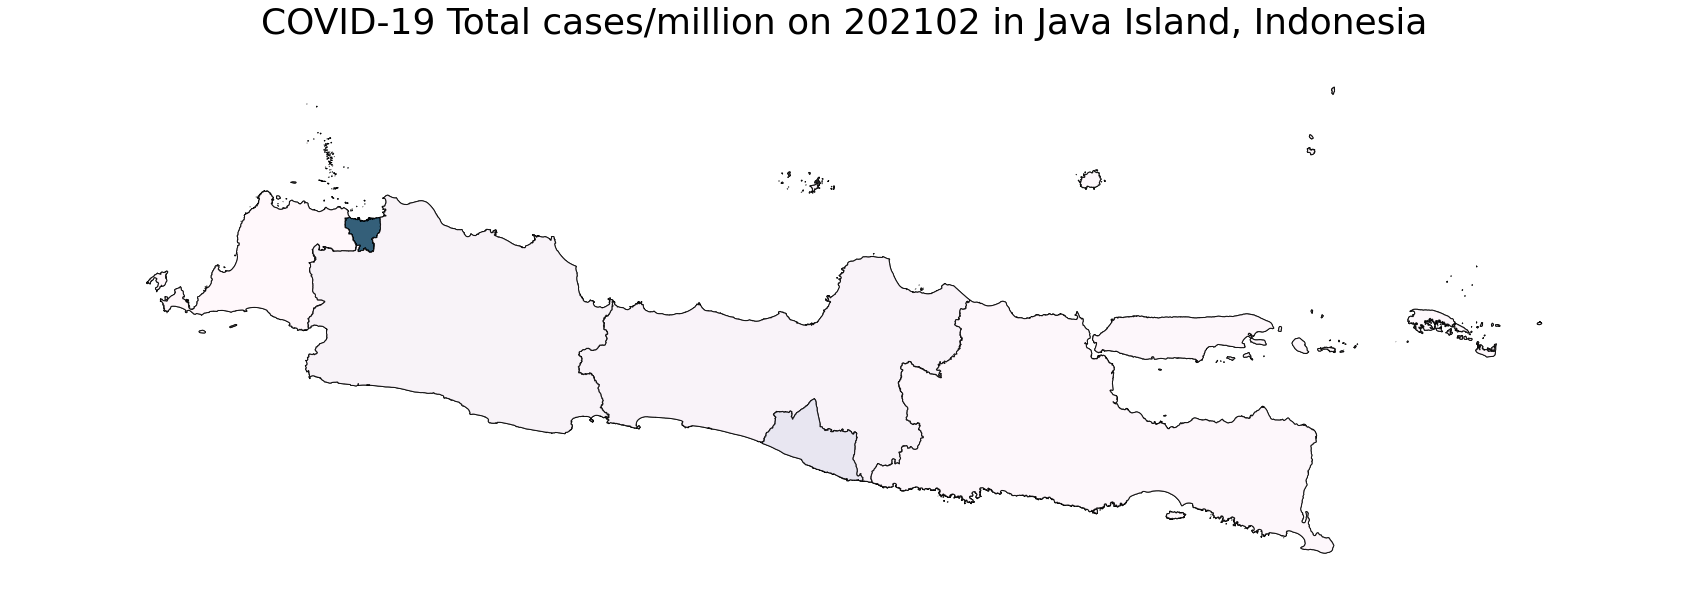

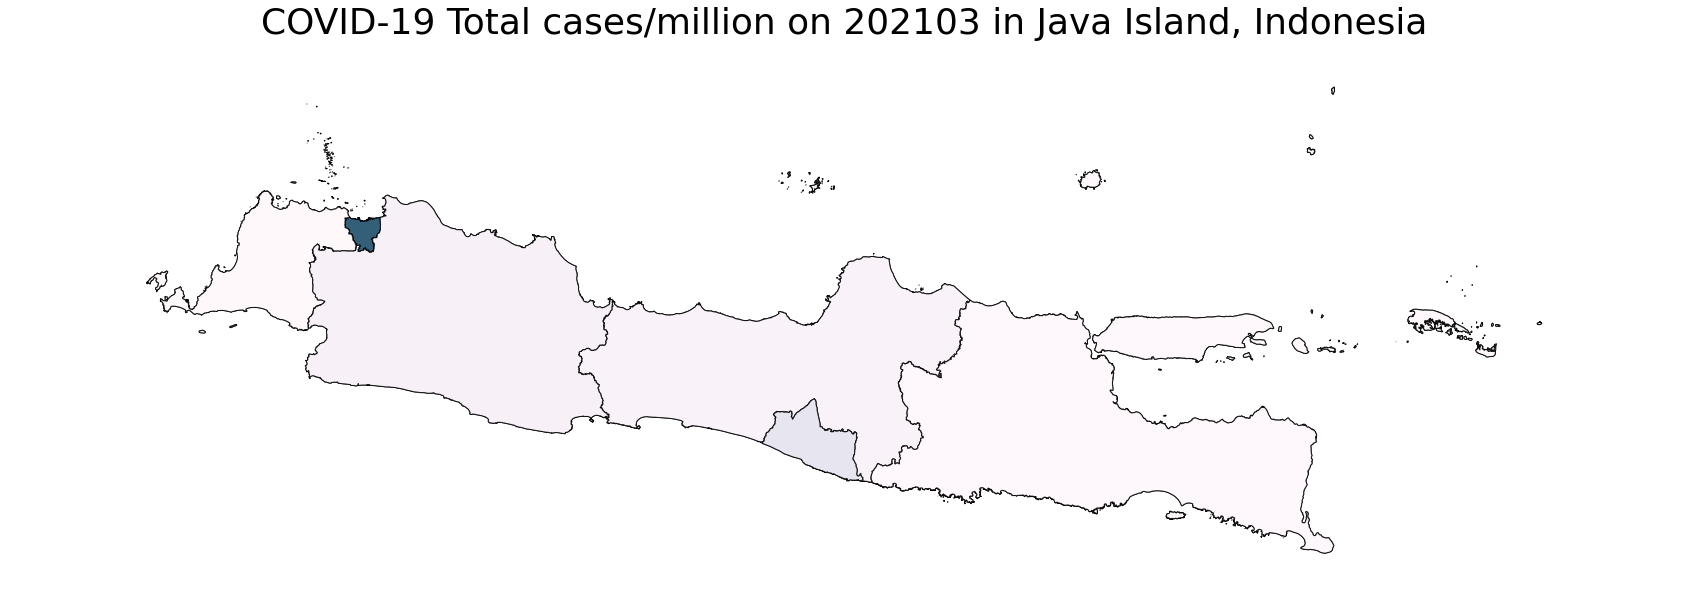

In [18]:
for date in date_list:
  pandas_temp = java_covid[java_covid["YearMonth"] == date]
  ax = gplt.choropleth(
  pandas_temp,
  hue= "Total Cases per Million",
  edgecolor="black",
  linewidth=1,
  cmap="PuBu",
  alpha = 0.8,
  # projection=gcrs.AlbersEqualArea(),
  figsize=(30, 30)
  )
  
  gplt.polyplot(javashp, edgecolor='black', ax=ax)
  ax.set_title(
  f"COVID-19 Total cases/million on {date} in Java Island, Indonesia",
  fontsize=36
  )


#Visualisasi Total case/million Indonesia February 2021

Merge data boundaries Indonesia dan data covid

In [19]:
ind_covid = indshp.merge(dfcovid, left_on="Provinsi", right_on="Province")
ind_covid.head()

NAME_0  ... Growth Factor of New Deaths
0  Indonesia  ...                       18.00
1  Indonesia  ...                       25.50
2  Indonesia  ...                       24.00
3  Indonesia  ...                       21.17
4  Indonesia  ...                       13.00

[5 rows x 31 columns]

In [20]:
#Untuk mendapatkan bulan dan tahun untuk iterasi dalam menampilkan sebaran covid setiap bulan
date_list2 = dfcovid.YearMonth.drop_duplicates()
date_list2.sort_values(ascending=True, inplace=True)  
date_list2


0     202003
1     202004
2     202005
3     202006
4     202007
5     202008
6     202009
7     202010
8     202011
9     202012
10    202101
11    202102
12    202103
Name: YearMonth, dtype: int64

Visualisasi Sebaran Covid setiap bulan dari Bulan Maret 2020 sampai Maret 2021

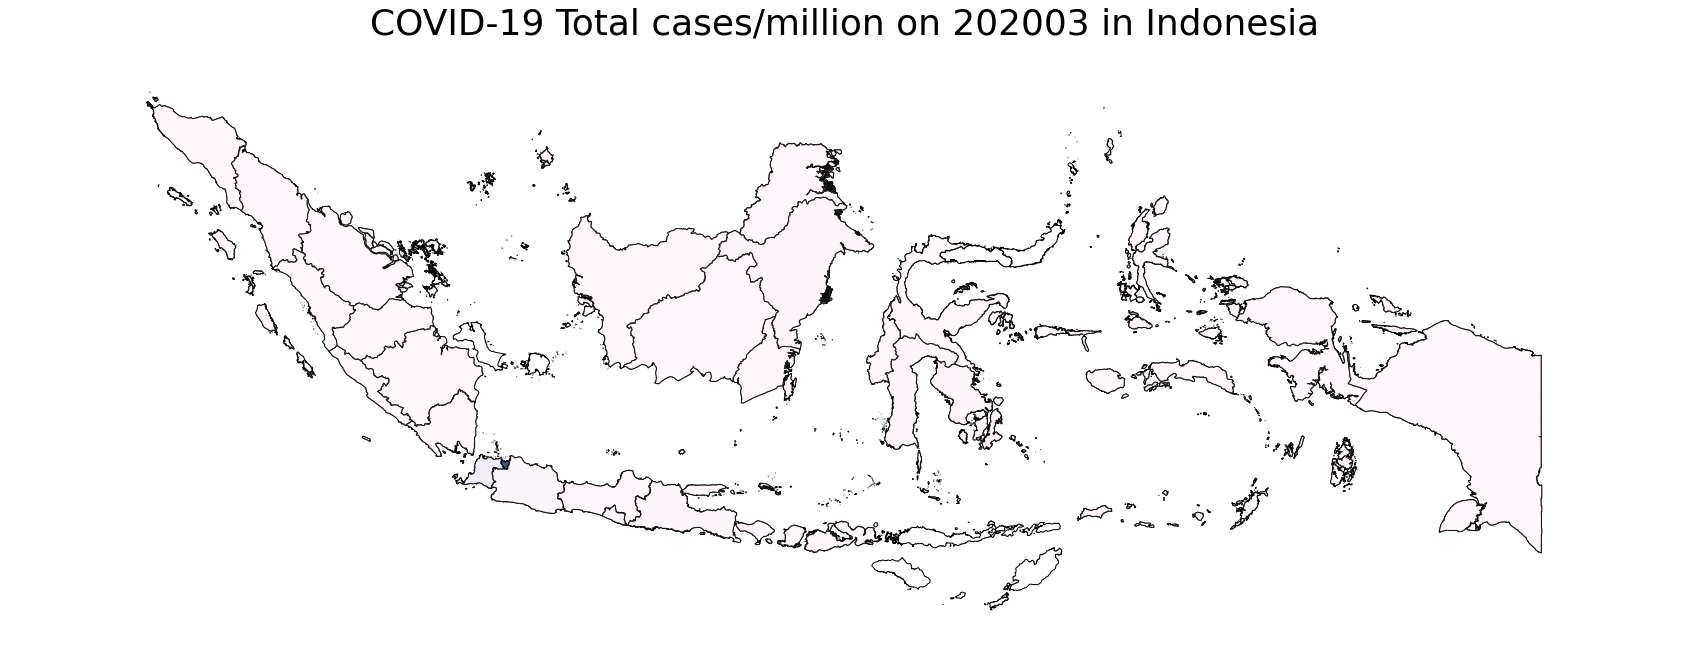

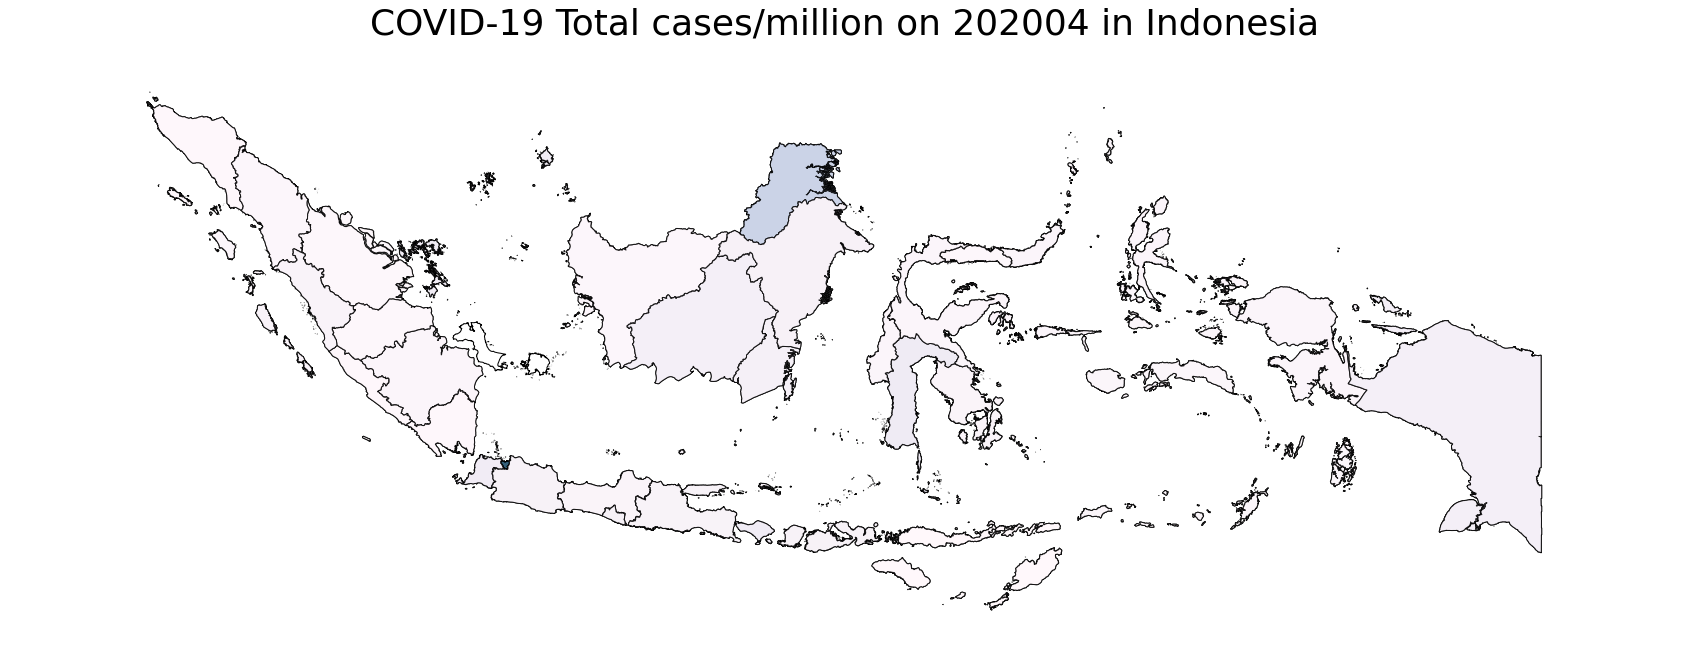

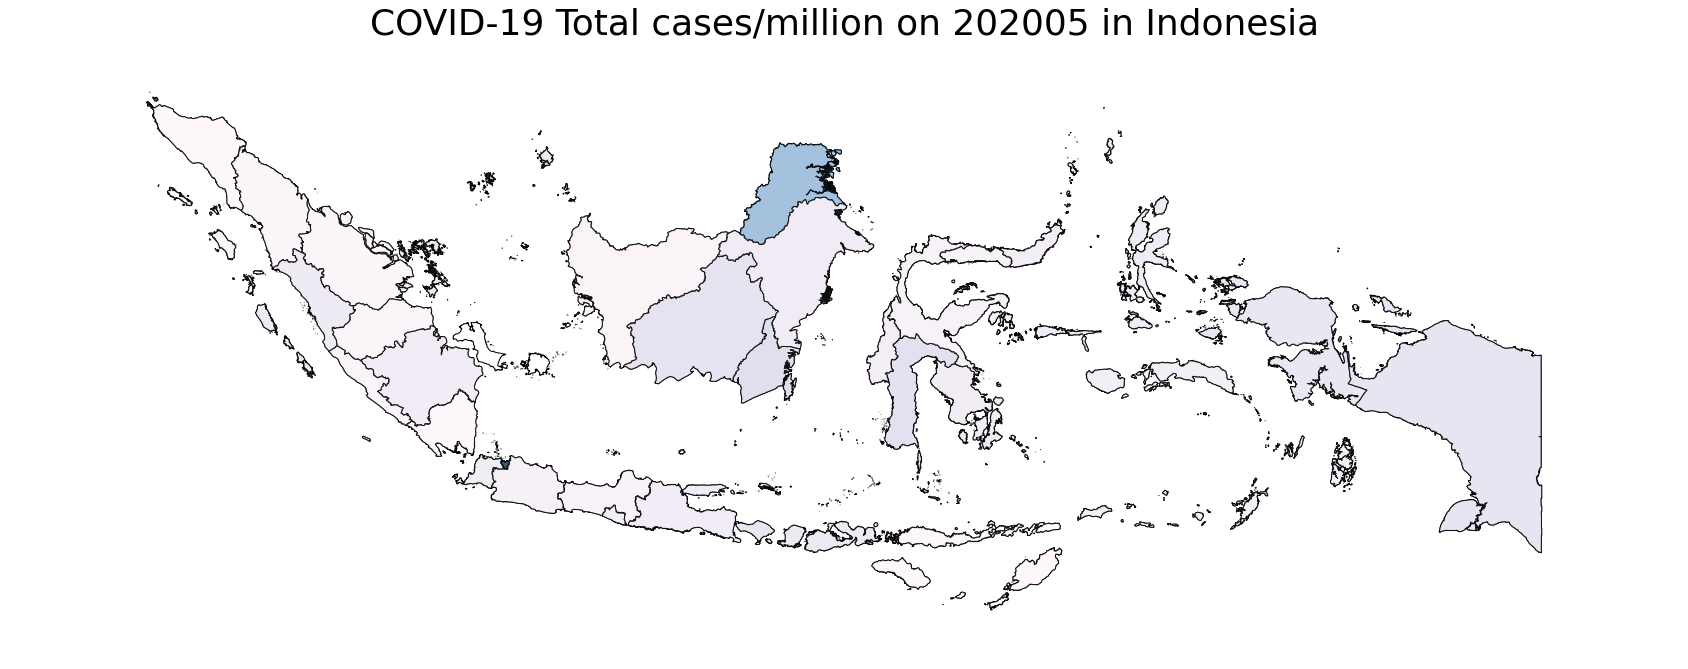

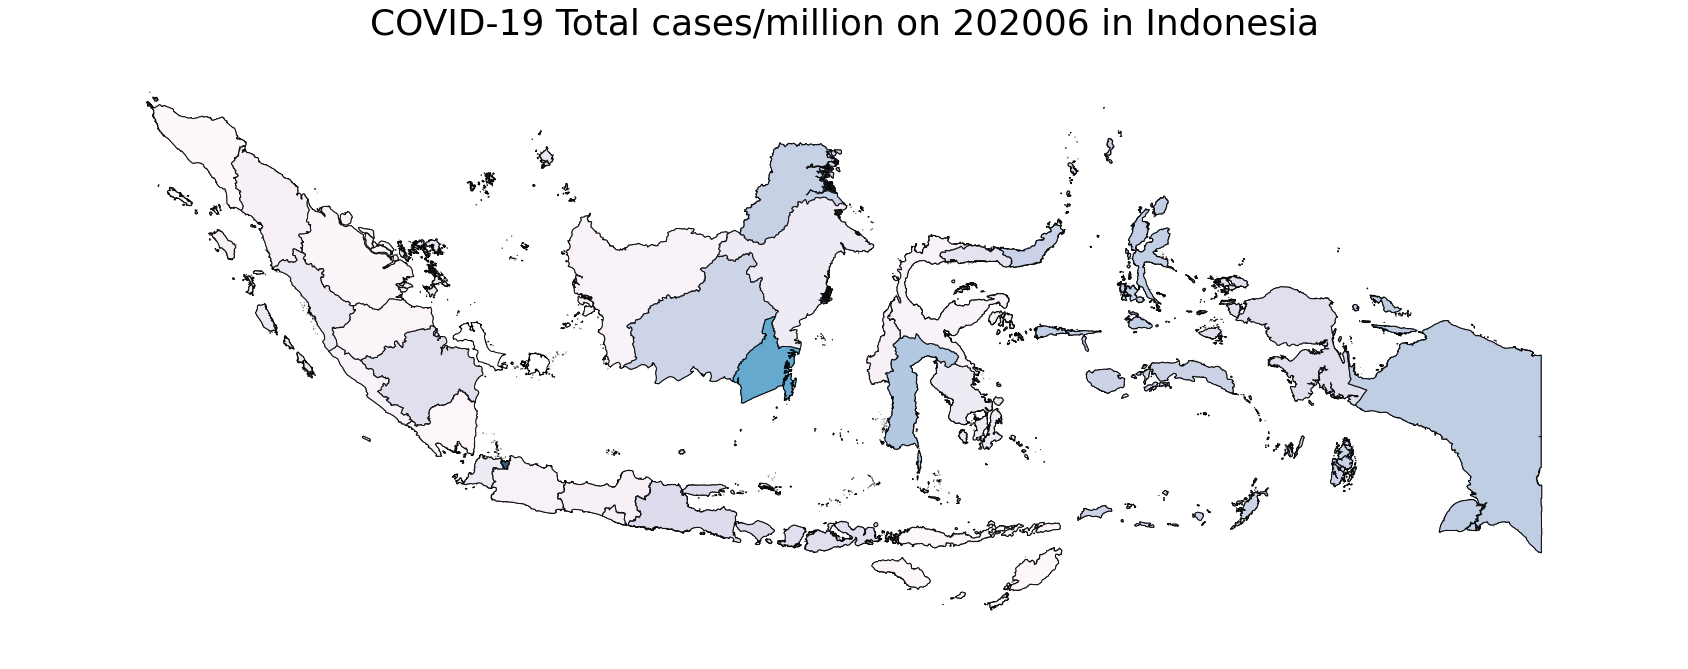

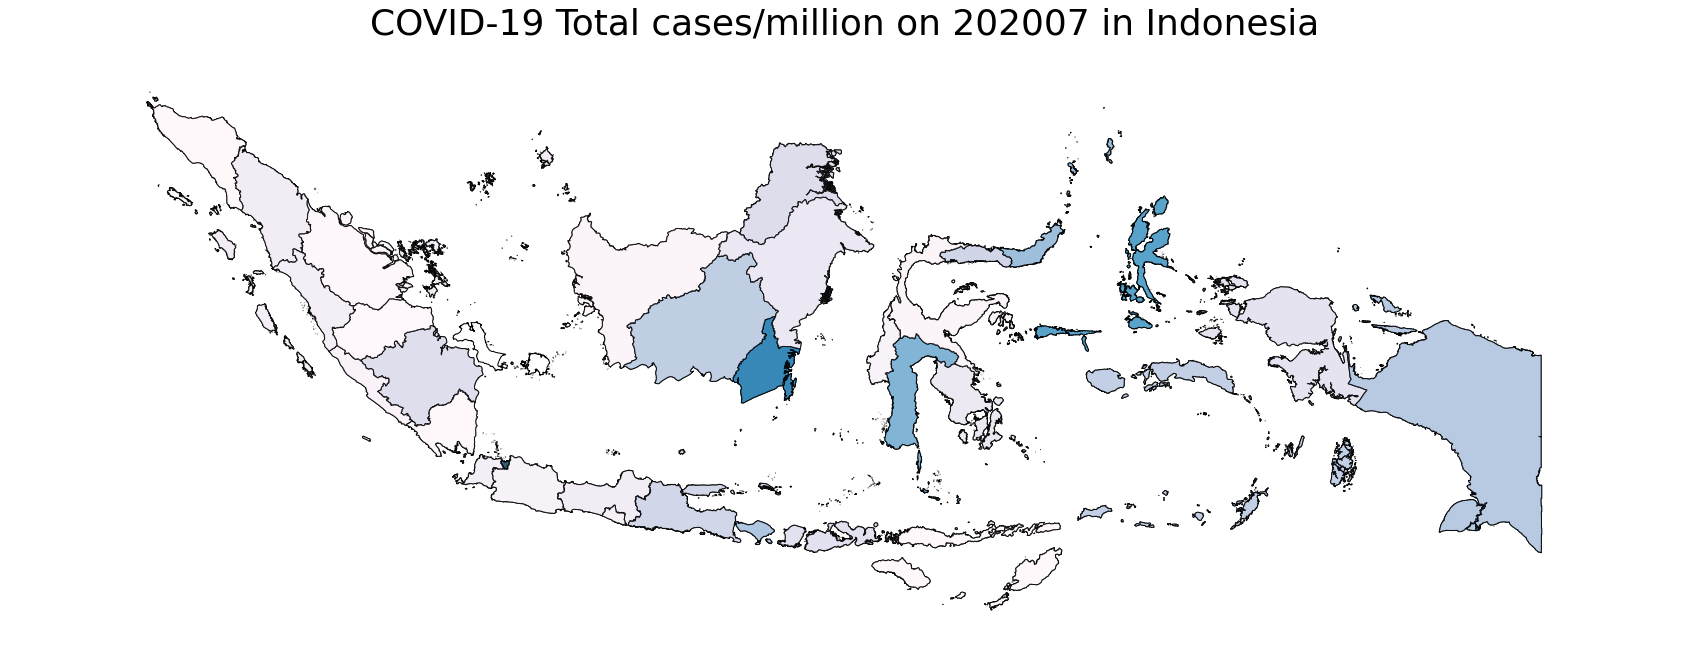

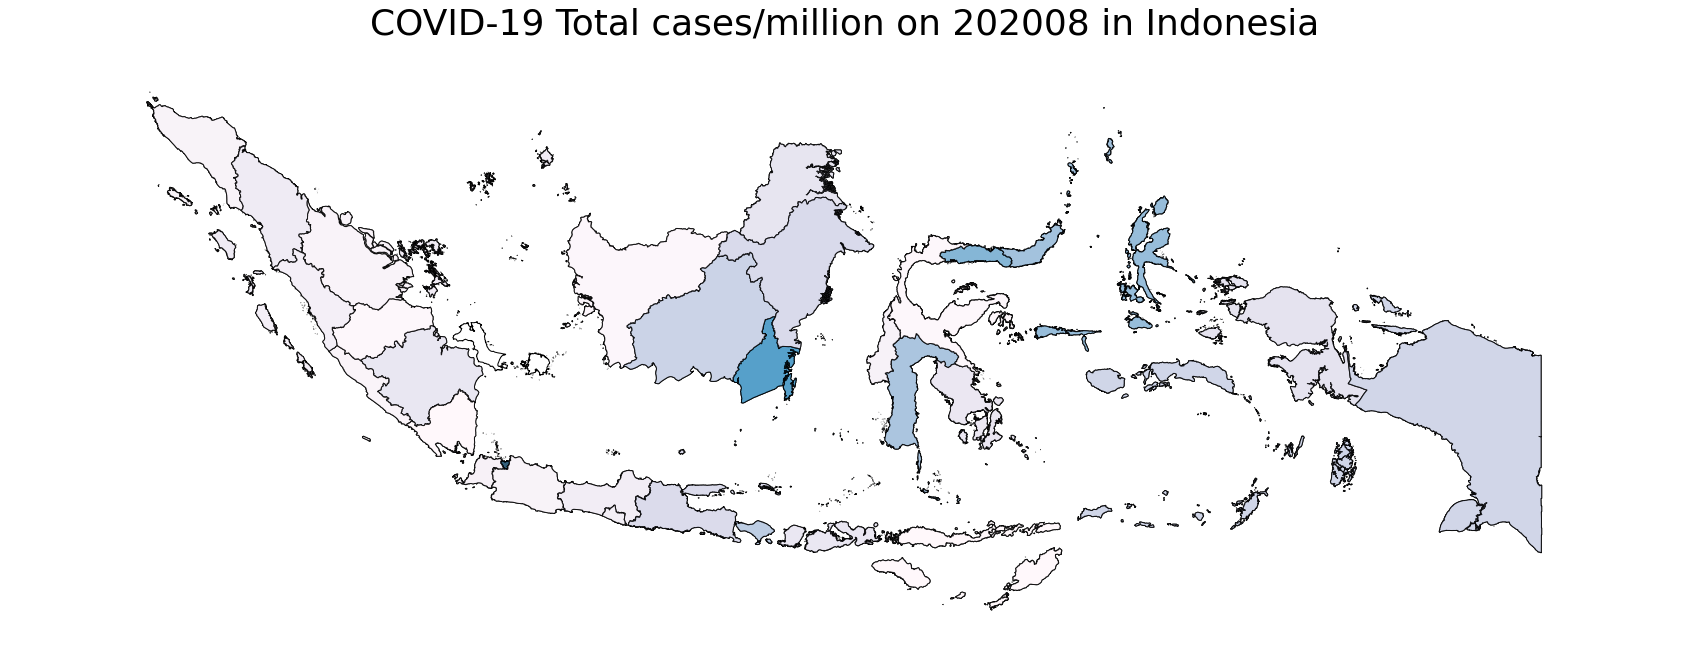

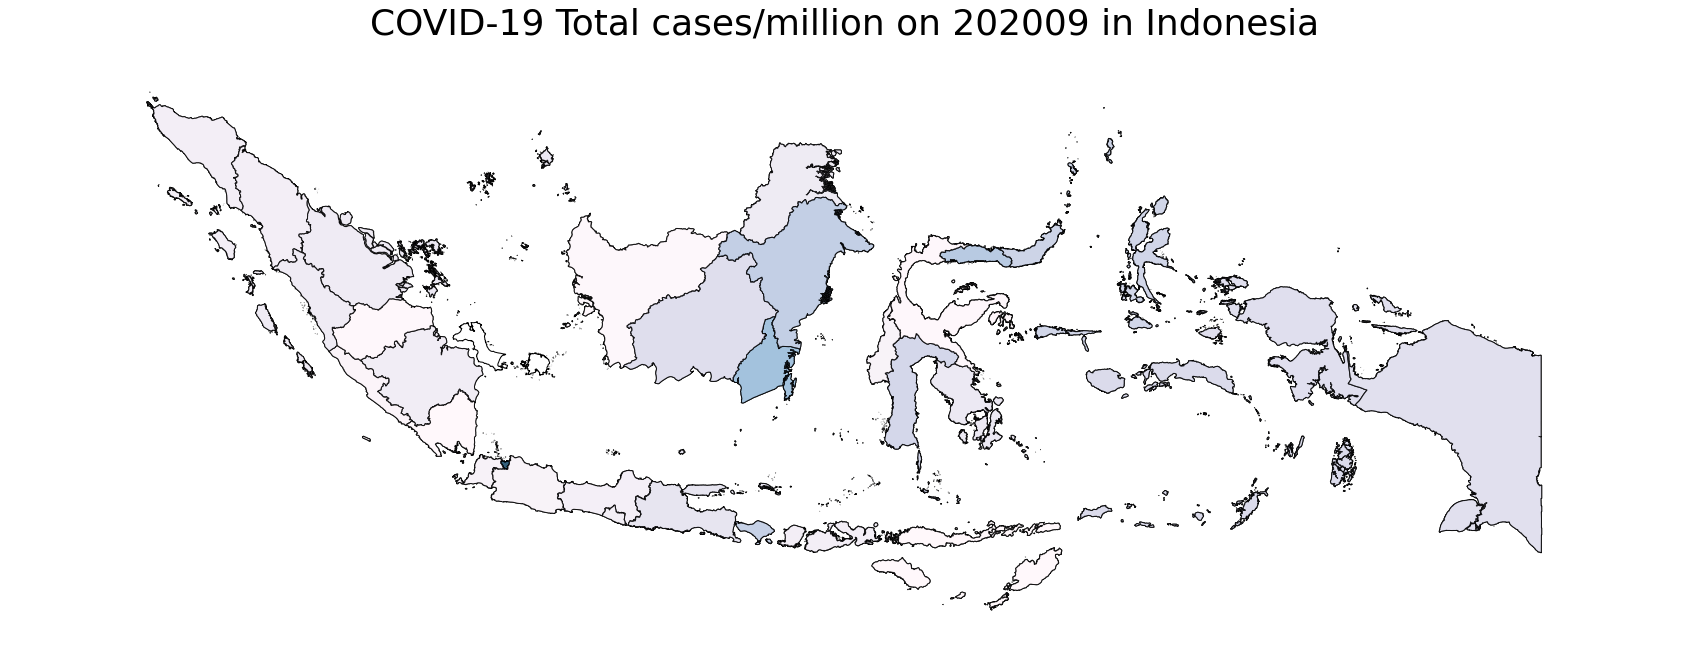

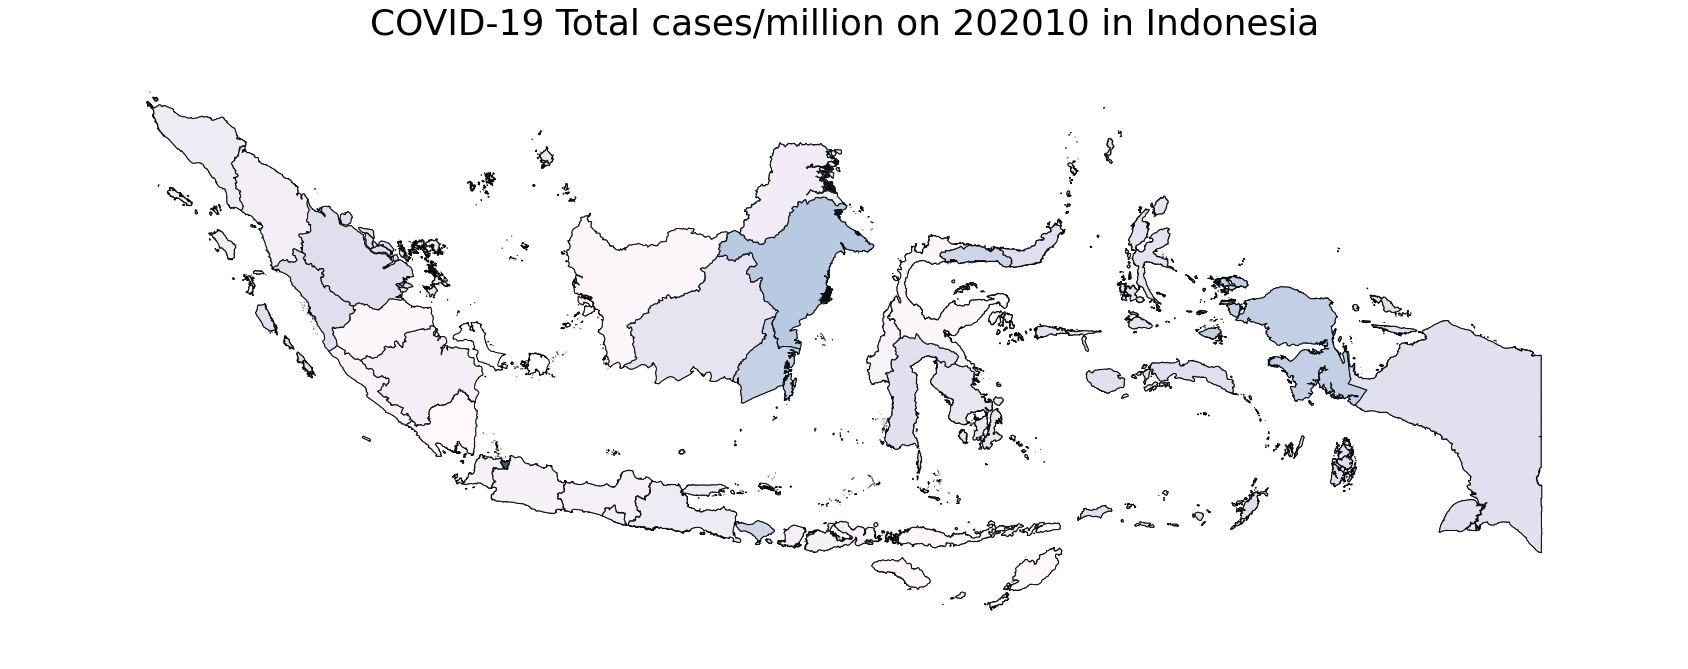

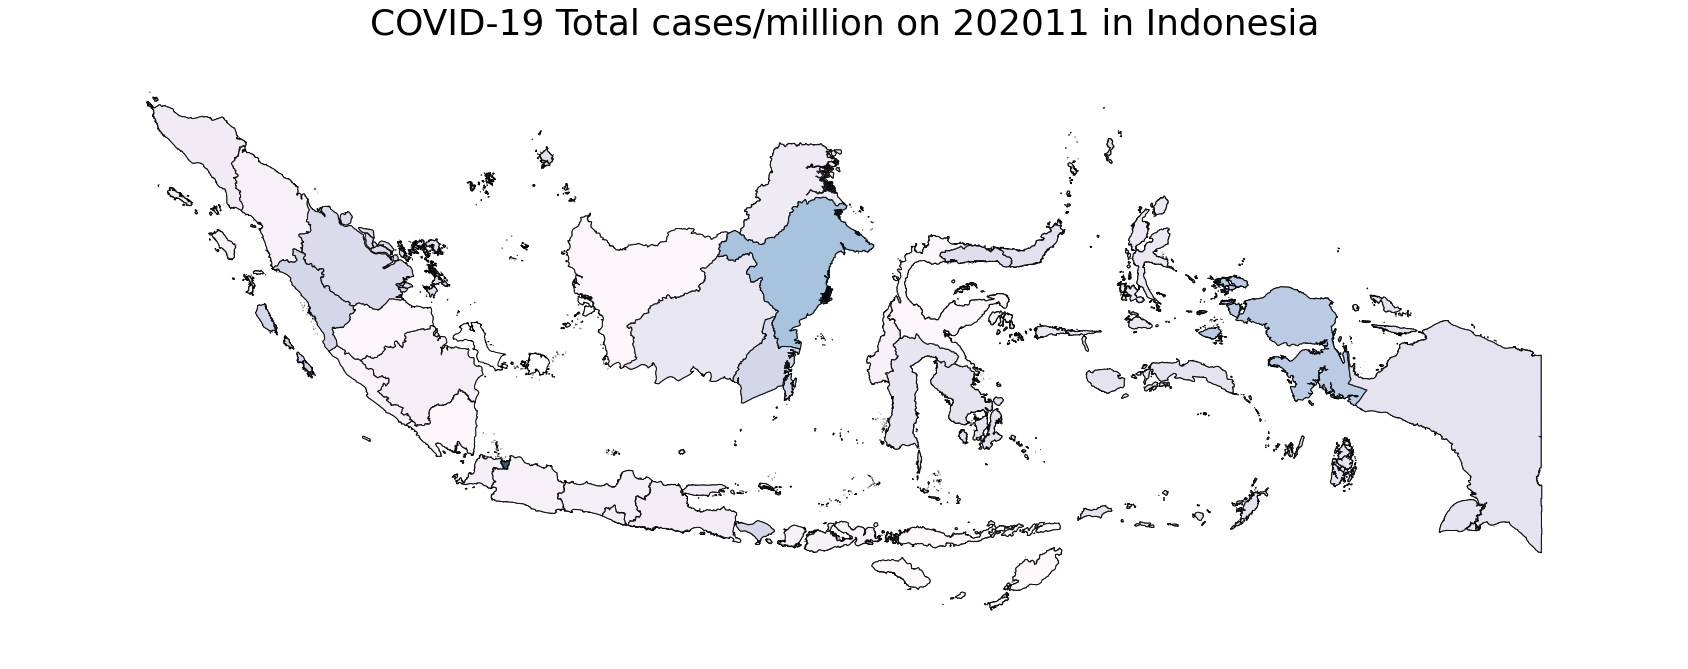

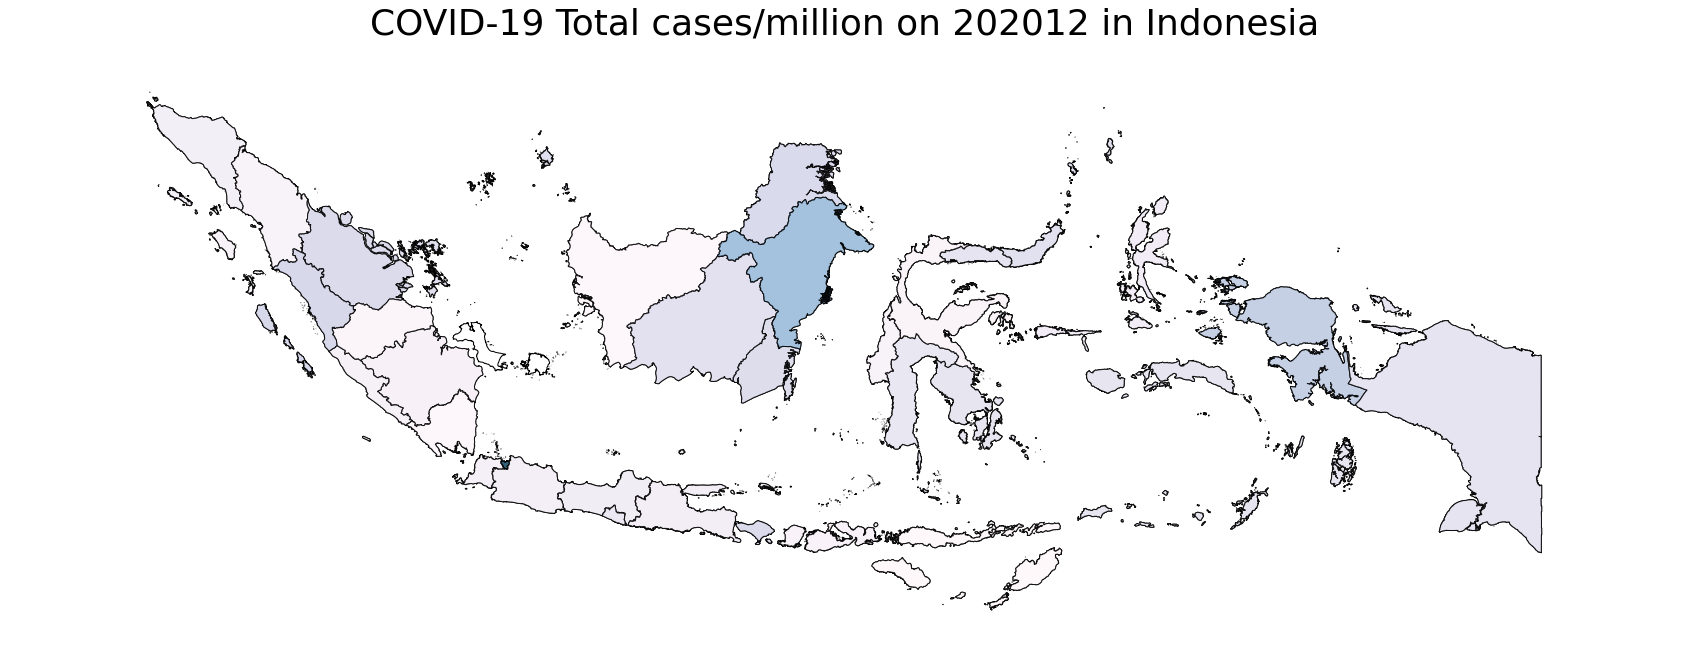

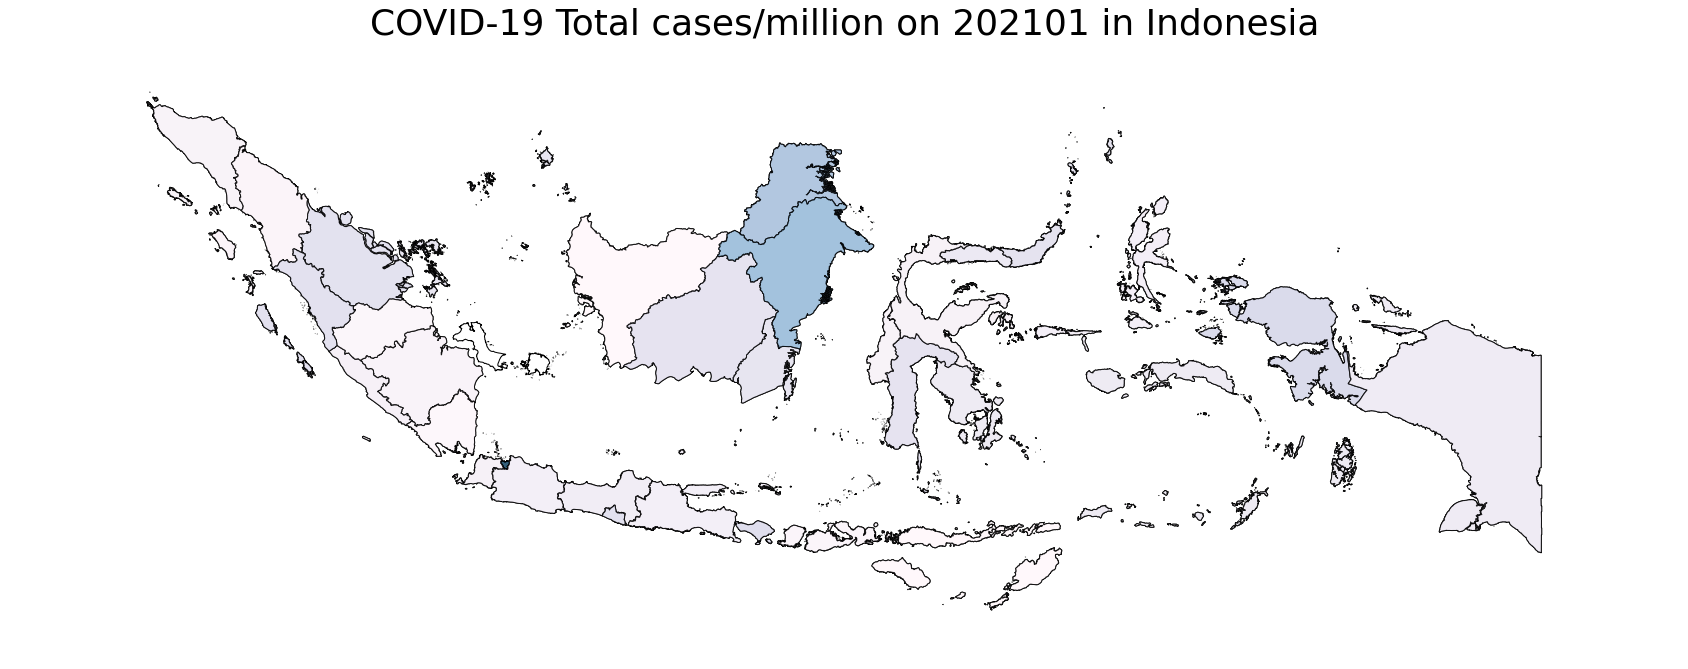

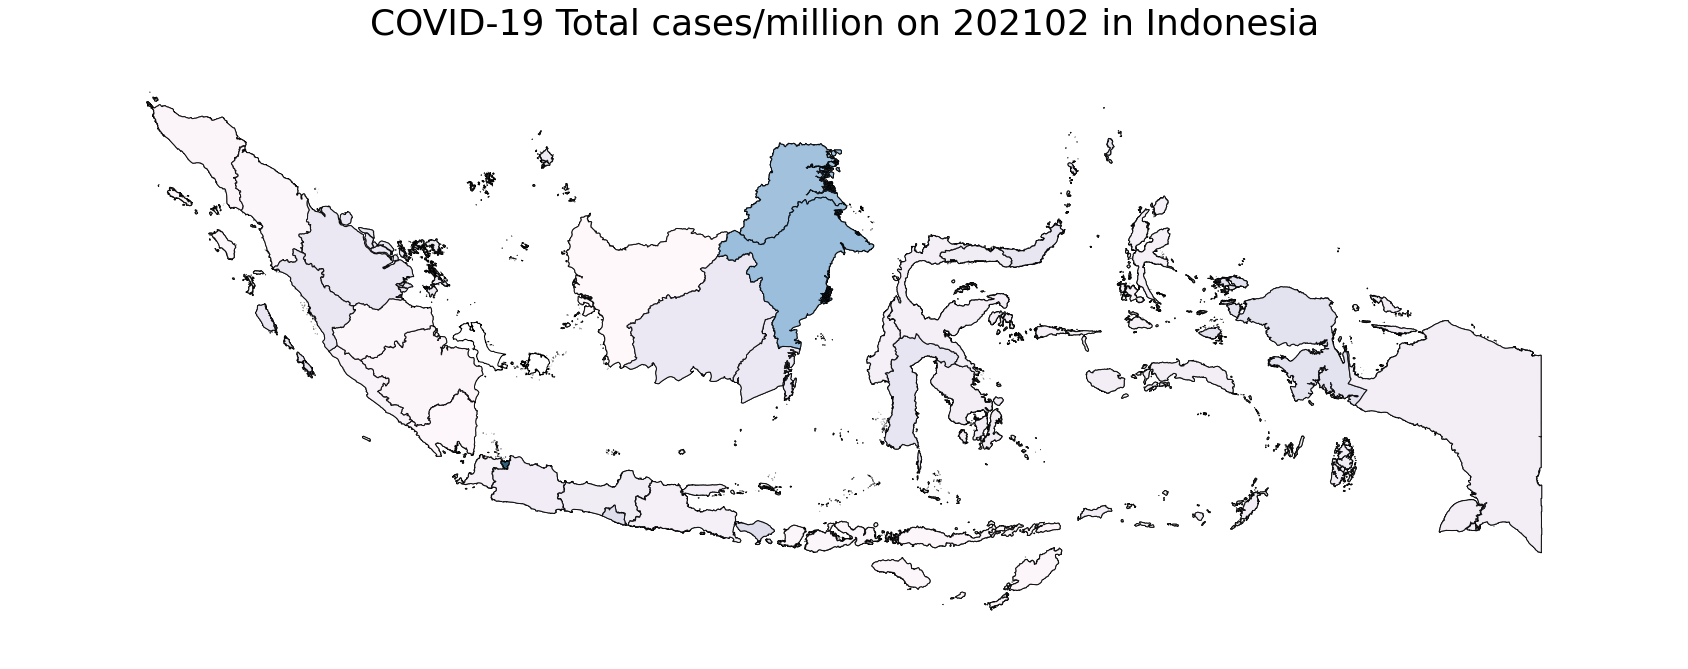

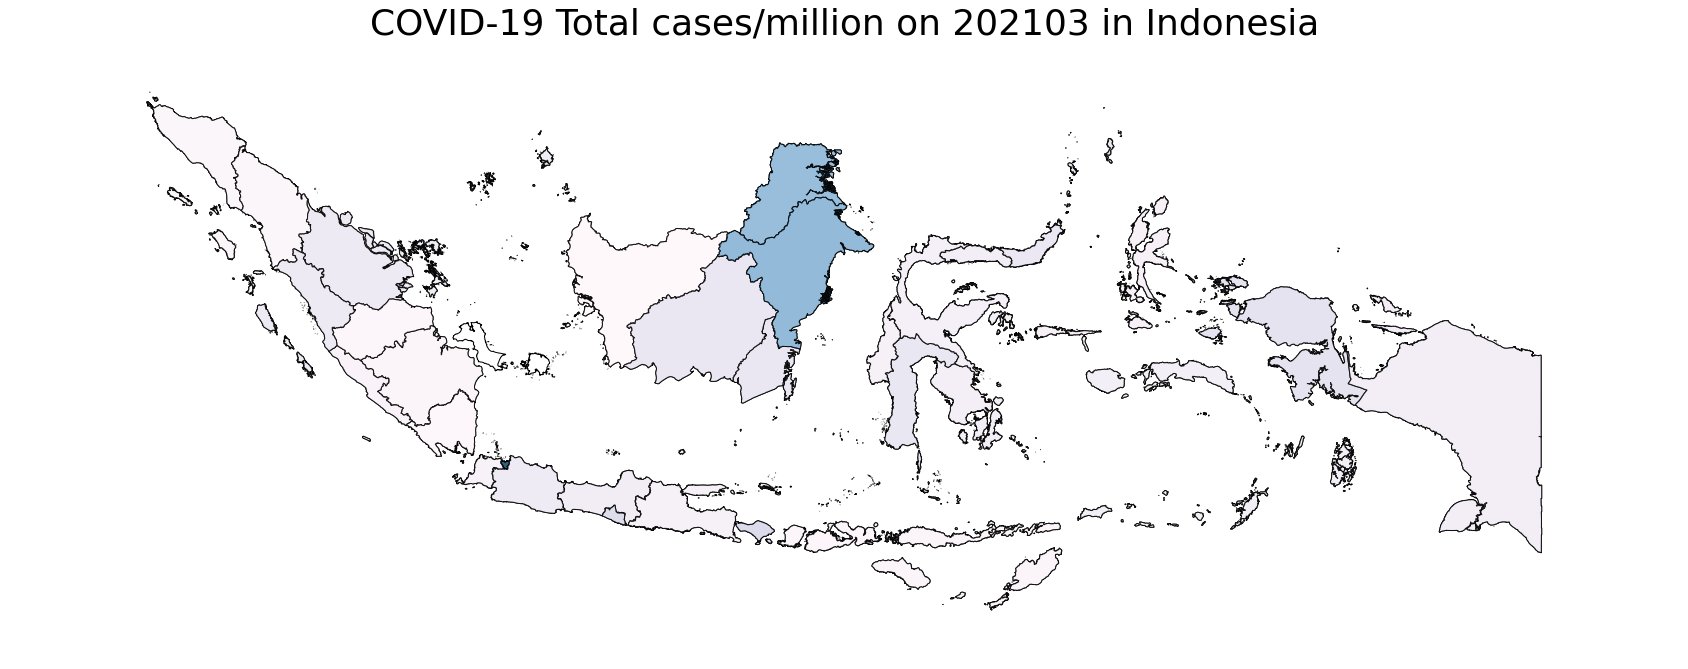

In [21]:
image_files= []
anim_path = pathlib.Path("anim/")
anim_path.mkdir(parents=True, exist_ok=True)
i=0
for date in date_list2:
    i+=1
    pandas_temp = ind_covid[ind_covid["YearMonth"] == date]
    ax = gplt.choropleth(
    pandas_temp,
    hue= "Total Cases per Million",
    edgecolor="black",
    linewidth=1,
    cmap="PuBu",
    alpha = 0.8,
    # projection=gcrs.AlbersEqualArea(),
    figsize=(30, 30)
    )
    
    gplt.polyplot(indshp, edgecolor='black', ax=ax)
    ax.set_title(
    f"COVID-19 Total cases/million on {date} in Indonesia",
    fontsize=36
    )
    file_name = str(anim_path / "{}.png".format(i))
    plt.savefig(file_name, bbox_inches="tight", pad_inches=0.1)
    image_files.append(file_name)

In [22]:
images = []

for file_name in image_files:
    images.append(imageio.imread(file_name))

gif_path = "movie.gif"
imageio.mimsave(gif_path, images, fps=2)